A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

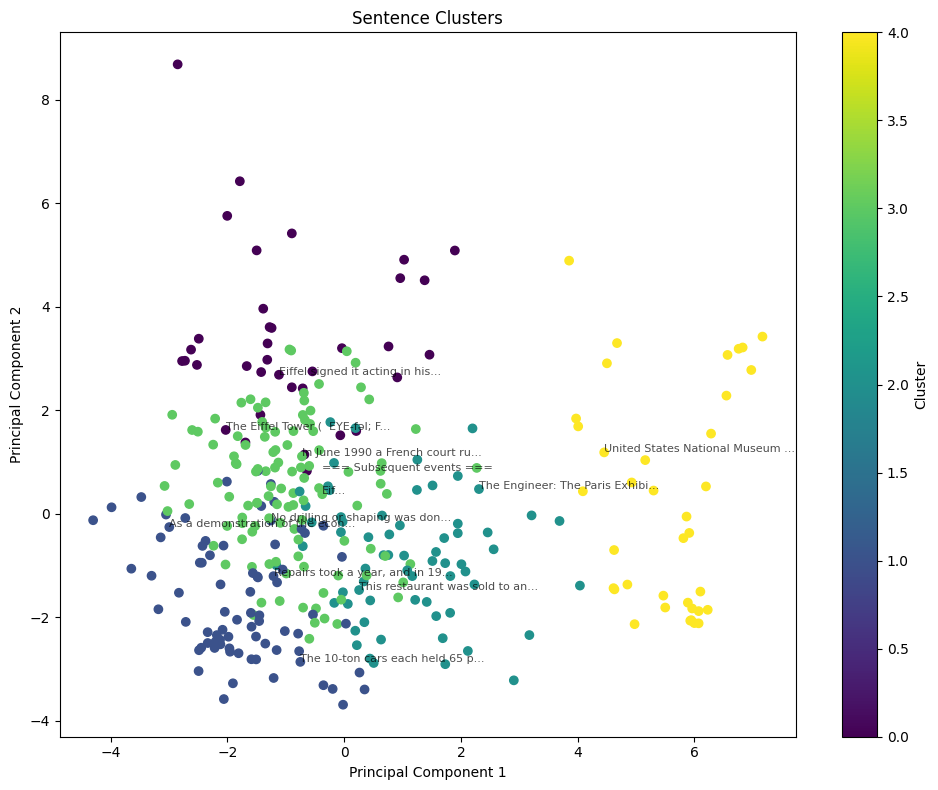

Summary of Eiffel Tower article:
=== Inauguration and the 1889 exposition ===

The main structural work was completed at the end of March 1889 and, on 31 March, Eiffel celebrated by leading a group of government officials, accompanied by representatives of the press, to the top of the tower. At this stage, a small "creeper" crane designed to move up the tower was installed in each leg. No French company wanted to undertake the work. The tower also lost its standing as the world's tallest tower to the Tokyo Tower in 1958 but retains its status as the tallest freestanding (non-guyed) structure in France. ISBN 0-7509-3309-7.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import torch
from transformers import BertTokenizer, BertModel
from nltk.tokenize import sent_tokenize
import wikipedia

def get_sentence_embeddings(sentences):
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased')
    
    # Tokenize sentences
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the embeddings for the [CLS] token
    embeddings = outputs.last_hidden_state[:, 0, :].numpy()
    
    return embeddings

def summarize_text(text, num_clusters=4):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Check if the number of sentences is less than or equal to the number of clusters
    if len(sentences) <= num_clusters:
        return text  # Return the original text if it's too short
    
    # Get embeddings for each sentence
    embeddings = get_sentence_embeddings(sentences)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(embeddings)
    
    # Get cluster labels for each sentence and cluster centers
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Group sentences and their embeddings by their cluster
    clustered_sentences = {i: [] for i in range(num_clusters)}
    clustered_embeddings = {i: [] for i in range(num_clusters)}
    for sentence, embedding, label in zip(sentences, embeddings, cluster_labels):
        clustered_sentences[label].append(sentence)
        clustered_embeddings[label].append(embedding)
    
    # Select the sentence closest to the centroid from each cluster
    summary_sentences = []
    for i in range(num_clusters):
        if clustered_sentences[i]:  # Check if the cluster is not empty
            distances = [np.linalg.norm(emb - cluster_centers[i]) for emb in clustered_embeddings[i]]
            closest_idx = np.argmin(distances)
            summary_sentences.append(clustered_sentences[i][closest_idx])
    
    # Join the summary sentences into a final summary
    summary = ' '.join(summary_sentences)
    
    return summary, embeddings, cluster_labels

def visualize_clusters(sentences, embeddings, cluster_labels):
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Plot the clusters
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis')
    
    # Add labels for a few points (to avoid clutter)
    for i in range(0, len(sentences), max(1, len(sentences) // 10)):  # Label every 10th sentence
        plt.annotate(sentences[i][:30] + '...', (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), 
                     fontsize=8, alpha=0.7)
    
    plt.colorbar(scatter, label='Cluster')
    plt.title('Sentence Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

try:
    eiffel_tower_content = wikipedia.page("Eiffel Tower").content
except wikipedia.exceptions.DisambiguationError as e:
    eiffel_tower_content = wikipedia.page(e.options[0]).content

# Summarize text and get clusters
summary, embeddings, cluster_labels = summarize_text(eiffel_tower_content, num_clusters=5)

# Visualize clusters if embeddings and cluster_labels are available
if embeddings is not None and cluster_labels is not None:
    sentences = sent_tokenize(eiffel_tower_content)
    visualize_clusters(sentences, embeddings, cluster_labels)

print("Summary of Eiffel Tower article:")
print(summary)


c:\Users\DishaDiya\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed interna

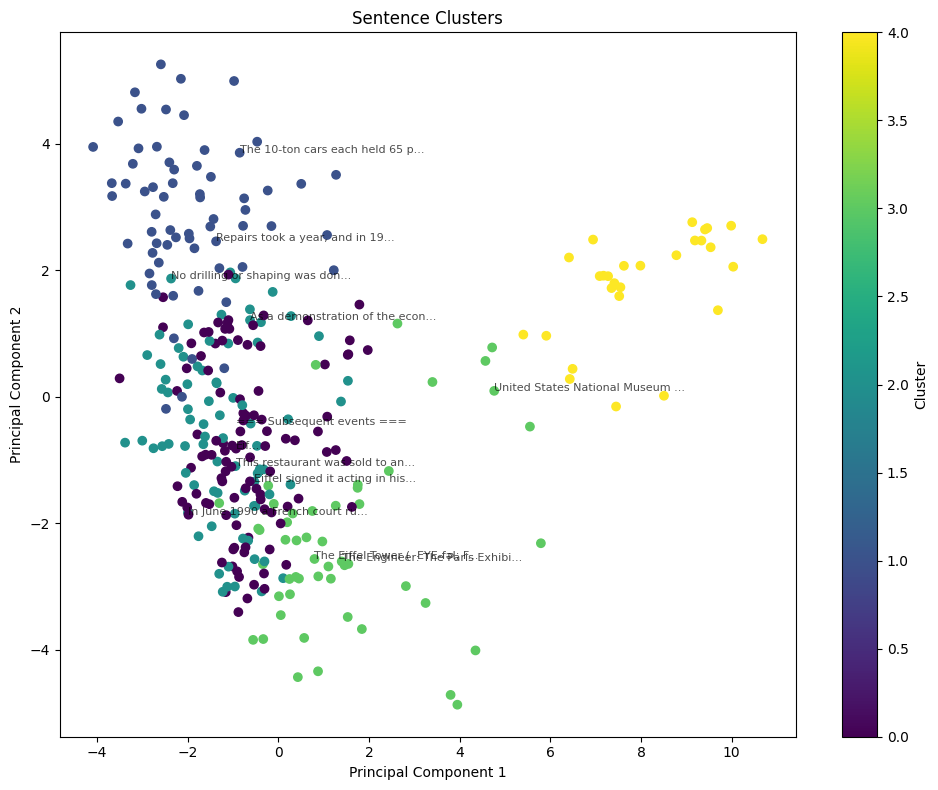

Summary of Eiffel Tower article:
From 1925 to 1934, illuminated signs for Citroën adorned three of the tower's sides, making it the tallest advertising space in the world at the time. At this stage, a small "creeper" crane designed to move up the tower was installed in each leg. A budget for the exposition was passed and, on 1 May, Lockroy announced an alteration to the terms of the open competition being held for a centrepiece to the exposition, which effectively made the selection of Eiffel's design a foregone conclusion, as entries had to include a study for a 300 m (980 ft) four-sided metal tower on the Champ de Mars. It came to a head as work began at the Champ de Mars: a "Committee of Three Hundred" (one member for each metre of the tower's height) was formed, led by the prominent architect Charles Garnier and including some of the most important figures of the arts, such as William-Adolphe Bouguereau, Guy de Maupassant, Charles Gounod and Jules Massenet. Vogel, Robert M. (1961).

In [1]:
import torch
from transformers import BertTokenizer, BertModel
from nltk.tokenize import sent_tokenize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import wikipedia

def get_sentence_embeddings(sentences):
    # Load pre-trained BERT model and tokenizer
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states=True)
    
    # Tokenize sentences
    inputs = tokenizer(sentences, return_tensors='pt', padding=True, truncation=True)
    
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Get the hidden states
    hidden_states = outputs.hidden_states

    # Get the second-to-last layer
    second_to_last_layer = hidden_states[-2]

    # Average the second-to-last layer, excluding [CLS] and [SEP] tokens
    sentence_embeddings = []
    for i, sent in enumerate(sentences):
        tokens = tokenizer.tokenize(sent)
        token_embeddings = second_to_last_layer[i, 1:len(tokens)+1]  # Exclude [CLS] and [SEP]
        sentence_embedding = torch.mean(token_embeddings, dim=0)
        sentence_embeddings.append(sentence_embedding)

    # Stack all sentence embeddings
    embeddings = torch.stack(sentence_embeddings).numpy()
    
    return embeddings

def summarize_text(text, num_clusters=4):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Check if the number of sentences is less than or equal to the number of clusters
    if len(sentences) <= num_clusters:
        return text, None, None  # Return the original text if it's too short
    
    # Get embeddings for each sentence
    embeddings = get_sentence_embeddings(sentences)
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(embeddings)
    
    # Get cluster labels for each sentence and cluster centers
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Group sentences and their embeddings by their cluster
    clustered_sentences = {i: [] for i in range(num_clusters)}
    clustered_embeddings = {i: [] for i in range(num_clusters)}
    for sentence, embedding, label in zip(sentences, embeddings, cluster_labels):
        clustered_sentences[label].append(sentence)
        clustered_embeddings[label].append(embedding)
    
    # Select the sentence closest to the centroid from each cluster
    summary_sentences = []
    for i in range(num_clusters):
        if clustered_sentences[i]:  # Check if the cluster is not empty
            distances = [np.linalg.norm(emb - cluster_centers[i]) for emb in clustered_embeddings[i]]
            closest_idx = np.argmin(distances)
            summary_sentences.append(clustered_sentences[i][closest_idx])
    
    # Join the summary sentences into a final summary
    summary = ' '.join(summary_sentences)
    
    return summary, embeddings, cluster_labels

def visualize_clusters(sentences, embeddings, cluster_labels):
    # Reduce dimensionality for visualization
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)
    
    # Plot the clusters
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=cluster_labels, cmap='viridis')
    
    # Add labels for a few points (to avoid clutter)
    for i in range(0, len(sentences), max(1, len(sentences) // 10)):  # Label every 10th sentence
        plt.annotate(sentences[i][:30] + '...', (reduced_embeddings[i, 0], reduced_embeddings[i, 1]), 
                     fontsize=8, alpha=0.7)
    
    plt.colorbar(scatter, label='Cluster')
    plt.title('Sentence Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.tight_layout()
    plt.show()

# Sample paragraph
try:
    eiffel_tower_content = wikipedia.page("Eiffel Tower").content
except wikipedia.exceptions.DisambiguationError as e:
    eiffel_tower_content = wikipedia.page(e.options[0]).content

# Summarize text and get clusters
summary, embeddings, cluster_labels = summarize_text(eiffel_tower_content, num_clusters=5)

# Visualize clusters if embeddings and cluster_labels are available
if embeddings is not None and cluster_labels is not None:
    sentences = sent_tokenize(eiffel_tower_content)
    visualize_clusters(sentences, embeddings, cluster_labels)

print("Summary of Eiffel Tower article:")
print(summary)